In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
dataset=pd.read_csv(r'C:\Users\gayatri modella\Downloads\loan_detection.csv')

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#by using the above parameters we are going to predict whether the customer is approved for loan or not.
#here we have many categorical variables like gender education,..

In [6]:
dataset.shape

(614, 13)

In [7]:
#614 rows,13 columns
#lets check now whether we have any empty values in the dataset or not.

In [8]:
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#here in gender column we have 13empty values like this there are some values in some columns.

In [10]:
#we have to remove those columns by using dropna.

In [11]:
dataset=dataset.dropna()

In [12]:
dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
#here we got 613 rows but there are 480 rows i.e index is effecting we have to reset them  

In [15]:
dataset.reset_index(inplace = True)

In [16]:
dataset

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
#now in dependents column we have some unqiue values like 3+ lets find all unqiue values in dependents

In [20]:
dataset['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [22]:
dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [24]:
dataset['Dependents'] = dataset['Dependents'].replace(to_replace='3+', value=4)


In [26]:
#replacing 3+ with 4

In [27]:
dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [28]:
#now visualising the education column that whether the person is educated or not

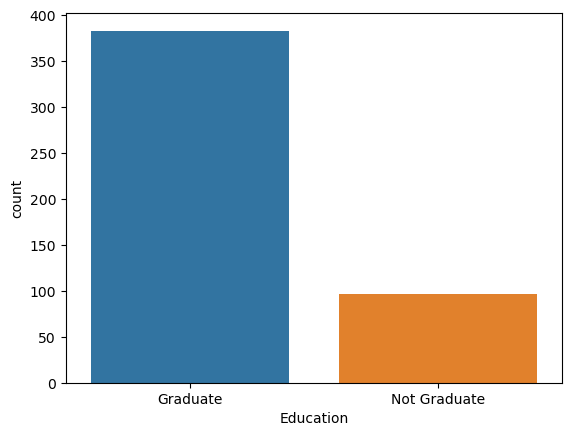

In [37]:
#visualizing the education column
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Education', data=dataset)
plt.show()





<Axes: xlabel='Education', ylabel='count'>

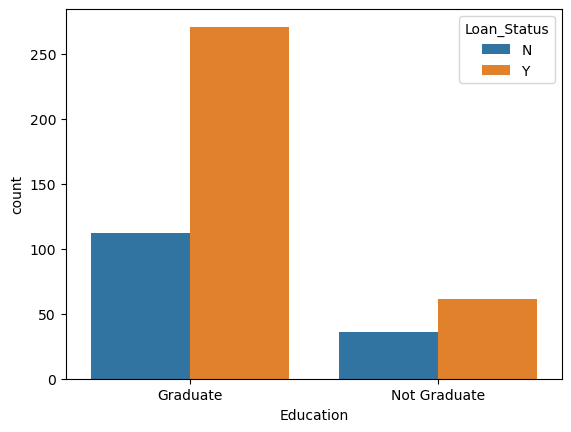

In [38]:
#combining education status with loan status
sns.countplot(x = 'Education', hue ='Loan_Status', data = dataset)

<Axes: xlabel='Married', ylabel='count'>

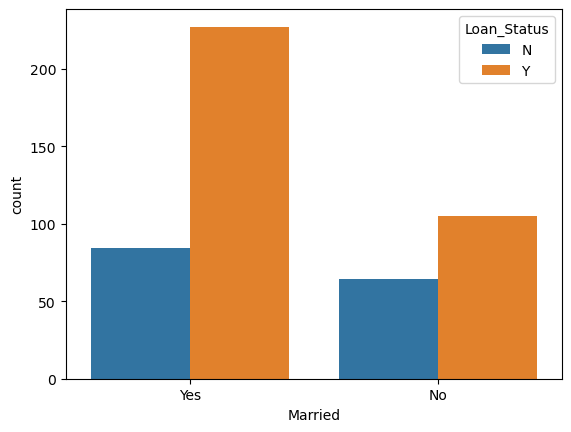

In [39]:
#combining married with loan status
sns.countplot(x = 'Married', hue ='Loan_Status', data = dataset)

In [40]:
dataset['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [41]:
#ENCODING THE CATEGORICAL TO NUMERICAL VARIABLES.

In [42]:
dataset.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [46]:
dataset.replace({'Married':{'Yes': 1, 'No': 0}, 'Gender':{'Male': 1, 'Female': 0},'Education':{'Graduate': 1,'Not Graduate': 0},
                 'Self_Employed':{'Yes': 1,'No': 0},'Loan_Status':{'Y': 1,'N': 0},'Property_Area':{'Rural': 0,'Urban': 1,'Semiurban': 2}},inplace = True)

In [47]:
dataset.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
2,3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
3,4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
4,5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [48]:
dataset['Dependents'] = dataset['Dependents'].astype('int')

In [51]:
X = dataset.iloc[: ,2:-1].values

In [52]:
X[0]

array([1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 4.583e+03,
       1.508e+03, 1.280e+02, 3.600e+02, 1.000e+00, 0.000e+00])

In [224]:
Y= dataset.iloc[:,-1].values

In [225]:
Y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [226]:
#this is a binary classification.so lets take some classification algorithms and train the model

In [227]:
X

array([[  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   1.],
       [  1.,   1.,   0., ..., 360.,   1.,   1.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   1.],
       [  1.,   1.,   2., ..., 360.,   1.,   1.],
       [  0.,   0.,   0., ..., 360.,   0.,   2.]])

In [229]:
from sklearn.model_selection import train_test_split

# Assuming x and y are your feature matrix and target vector, respectively
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.25, random_state=42)


In [230]:
x_train.shape

(360, 11)

In [231]:
x_test.shape

(120, 11)

In [232]:
#lets train our model by using different classifiers.and check which classifier is performing well.

In [264]:
from sklearn.linear_model import LogisticRegression
log_Classifier = LogisticRegression()
log_Classifier.fit(x_train , Y_train)

C:\Autodesk\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [265]:
log_Y_pred = log_Classifier.predict(x_test)

<Axes: >

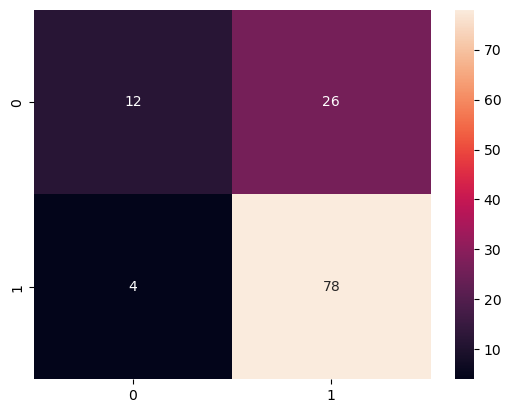

In [266]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test , log_Y_pred)
cm
sns.heatmap(confusion_matrix(Y_test, log_Y_pred), annot = True)

In [267]:
#lets check accuracy of the model like how correctly it is  predicting

In [268]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, log_Y_pred)

0.75

In [269]:
#KNN CLASSIFIER

In [270]:
from sklearn.neighbors import KNeighborsClassifier
k_classifier= KNeighborsClassifier(n_neighbors=5)
k_classifier.fit(x_train , Y_train)

KNeighborsClassifier()

In [271]:
k_Y_pred = k_classifier.predict(x_test)

<Axes: >

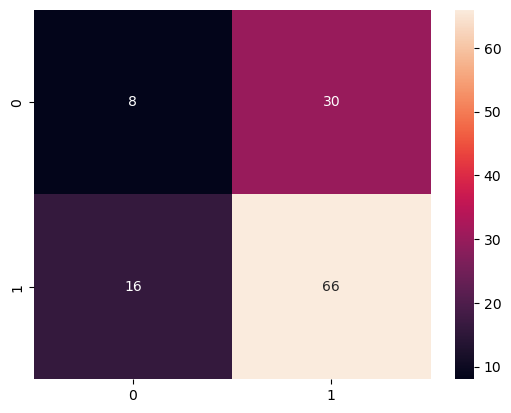

In [272]:
sns.heatmap(confusion_matrix(Y_test, k_Y_pred), annot = True)

In [273]:
#here our model doesnt perform well becoz false negatives nd false positives very high, if we check accuracy value is will be less lets check.

In [274]:
accuracy_score(Y_test, k_Y_pred)

0.6166666666666667

In [275]:
#if we compare logistic regression and accuracy score it is very less 

In [276]:
#RANDOM FOREST CLASSIFIER

In [277]:
#lets train the model by using this classifier,ensemble learning works on every data in most of the cases,this doesnt mean it should work but this gives good result

In [278]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy')
Classifier.fit(x_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25)

In [279]:
#here n_estimators = 25 this means i am taking 25 decesion trees.

In [280]:
Y_pred = Classifier.predict(x_test)


<Axes: >

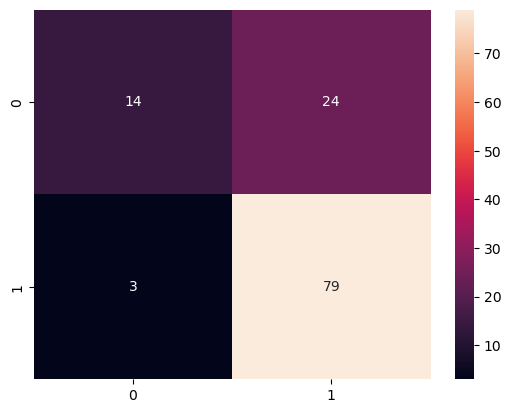

In [281]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot = True)

In [282]:
accuracy_score(Y_test, Y_pred)

0.775

In [ ]:
#the end.